# Iteration protocol in python

- __Iteration__: Repitition of a process.
- __Iterable__: A Python object which supports iteration
- __Iterator__: A Python object to perform iteration over an iterable.

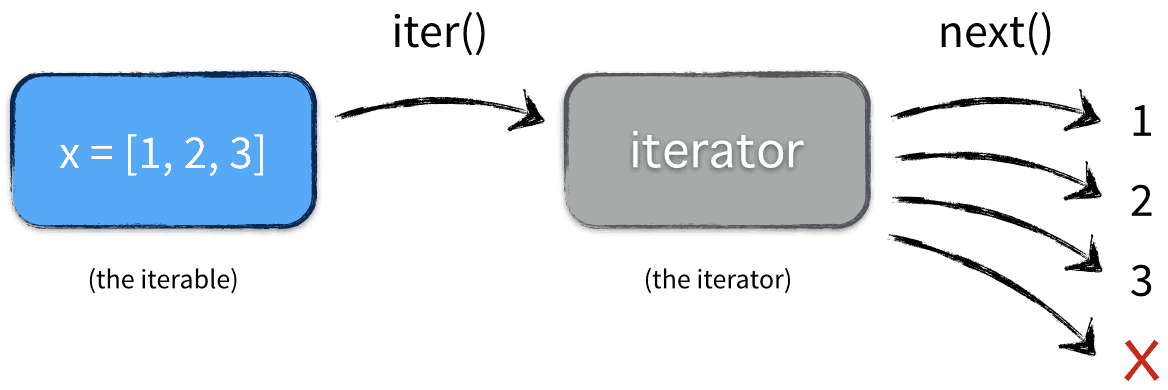

In [4]:
# For an iterable object such as a list:
x = [1,2,3]

# Passing (the iterable) to a iter() fn will return us an iterator
iterator = iter(x)

In [24]:
print(type(iterator))

<class 'list_iterator'>


In [5]:
# To iterate, we pass it to next() fn
print(next(iterator))

1


In [6]:
# Again passing it to the next() fn will give out the next element 
print(next(iterator))

2


Instance 2

In [25]:
y = [1,2,3,4,5,6]
iterator_2 = iter(y)

In [26]:
# This works until there is no more
while iterator_2:
    try:
        print(next(iterator_2))
    except:
        break # Breaking here, so that no exception is raised on trying to print something that doesn't exist
        # A StopIteration exception would have been raised otherwise

1
2
3
4
5
6


## Iteration protocol in python

__Iteration protocol__ : how iterables actually work in python
1. For a class object to be an iterable
 - Can be passed to the __iter__ function to get an iterator for them
2. For an iterator:
 - Can be passed to the __next__ function which gives their next item or raise StopIteration
 - Return themselves when passed to the __iter__ function.

### Creating own Iterator

In [44]:
# The class is both iterable and iterator
class yrange:
    def __init__(self,end):
        self.start = 0 # inclusive start
        self.end = end # exclusive end
        
    def __iter__(self): # This method makes our class iterable
        return self
        
    def __next__(self): # This method should be implemented by the iterator
        if self.start < self.end:
            start = self.start
            self.start += 1
            return start
        else:
            raise StopIteration()

In [45]:
for x in yrange(10):
    print(x,end = ' ')

0 1 2 3 4 5 6 7 8 9 

In [46]:
new_y = yrange(10)

In [47]:
iterator_new_y = iter(new_y)

In [49]:
while True:
    try:
        print(next(iterator_new_y))
    except:
        break

0
1
2
3
4
5
6
7
8
9


Here, we've written both __iter__ and __next__ in the same class which is a bad practice.
Below is how we should implement it:

In [55]:
class zrange:
    def __init__(self,end):
        self.end = end
    def __iter__(self): # To make it iterable 
        return zrange_iter(self.end)
class zrange_iter:
    def __init__(self,end):
        self.start = 0
        self.end = end
    def __iter__(self):
        return self
    def __next__(self): # This is from where we get its iterator
        if self.start < self.end:
            ans = self.start
            self.start += 1
            return ans
        else:
            raise StopIteration()

In [56]:
for i in zrange(10):
    print(i,end = ' ')

0 1 2 3 4 5 6 7 8 9 

Here, we have a separate class __zrange_iter__ to make class __zrange__ an iterable and iterator.
In the iter method defined in zrange, we pass the object created as an instance of zrange_iter which receives similar range.
 - Why do we do this?

In [68]:
# For instance 
y_obj = yrange(10)

In [69]:
# Although, y_obj is an iterable object but it can only be consumed once i.e
y_aux_list = list(y_obj)
print(y_aux_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [70]:
# If we again try to consume it
y_aux_list2 = list(y_obj)
print(y_aux_list2) # An empty list

[]


In [66]:
# While the object of zrange can be consumed multiple times
z_obj = zrange(10)

In [71]:
z_aux_list = list(z_obj)
print(z_aux_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [72]:
z_aux_list2 = list(z_obj)
print(z_aux_list2) 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Why does this happen?
- Because iterators and iterables are 2 different classes.
- Everytime in zrange when we demand for an iterable object (to consume or for other purposes) from       iter method, we receive a new object each time (since we return an object by zrange_iter class).
- This is the reason we are able to consume the object multiple times.
  